In [2]:
import sys
sys.path.insert(0, '../../backend/src')

# import matplotlib
%matplotlib widget
import matplotlib

plt = matplotlib.pyplot

import numpy as np
from utils import s3, constants, utils

In [3]:
model = s3.load_model(constants.USGS_SITE)
archive = s3.fetch_archive_data()

WARNING - (py.warnings._showwarnmsg) - /Users/jaismith/Developer/personal/flowcast/backend/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(



Empty DataFrame
Columns: [usgs_site#type, timestamp, snow, precip, snowdepth, cloudcover, streamflow, airtemp, usgs_site, watertemp, type]
Index: []


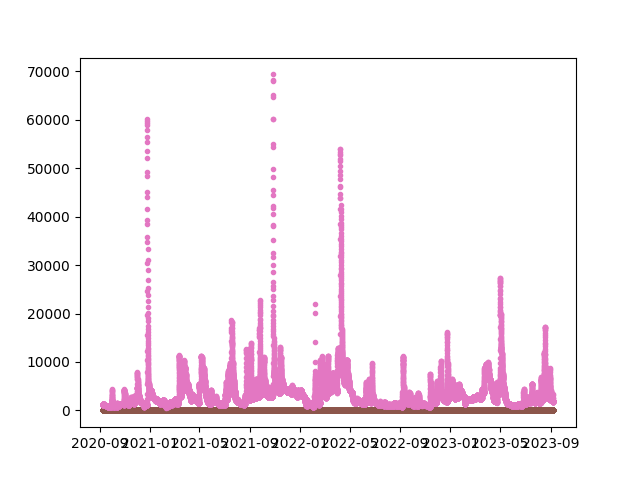

In [4]:
print(archive[archive['streamflow'].isnull()].sort_index())

plt.plot(archive[['snow', 'snowdepth', 'precip', 'cloudcover', 'airtemp', 'watertemp', 'streamflow']], linestyle='None', marker='.')
plt.show()

In [20]:
historical = utils.prep_archive_for_training(archive)
train_df, test_df = model.split_df(historical, freq='H', valid_p=1.0 / 16)

print(train_df.shape, test_df.shape)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


(24585, 7) (1839, 7)


In [22]:
test_df.at[24441, 'snow'] = 0.01
test_df.at[24441, 'snowdepth'] = 0.01
print(test_df)

forecast = model.predict(test_df)

model.highlight_nth_step_ahead_of_each_forecast(24).plot(forecast, forecast_in_focus=24)
# model.plot_components(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


                       ds  snow  precip  snowdepth  cloudcover    airtemp  \
24441 2023-06-23 12:00:00  0.01     0.0       0.01       100.0  66.900002   
24442 2023-06-23 13:00:00  0.00     0.0       0.00       100.0  67.199997   
24443 2023-06-23 14:00:00  0.00     0.0       0.00       100.0  68.800003   
24444 2023-06-23 15:00:00  0.00     0.0       0.00       100.0  69.800003   
24445 2023-06-23 16:00:00  0.00     0.0       0.00       100.0  71.699997   
...                   ...   ...     ...        ...         ...        ...   
26275 2023-09-07 22:00:00  0.00     0.0       0.00         0.0  58.000000   
26276 2023-09-07 23:00:00  0.00     0.0       0.00         0.0  58.000000   
26277 2023-09-08 00:00:00  0.00     0.0       0.00         0.0  58.000000   
26278 2023-09-08 01:00:00  0.00     0.0       0.00         0.0  58.000000   
26279 2023-09-08 02:00:00  0.00     0.0       0.00         0.0  58.000000   

               y  
24441  69.260002  
24442  69.260002  
24443  69.080002  

Predicting: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/jaismith/Developer/personal/flowcast/backend/.venv/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/jaismith/Developer/personal/flowcast/backend/.venv/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/jaismith/Developer/personal/flowcast/backend/.venv/lib/python3.10/site-pac

FigureWidgetResampler({
    'data': [{'fillcolor': 'rgba(45, 146, 255, 0.2)',
              'line': {'color': 'rgba(45, 146, 255, 0.2)', 'width': 1},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat24 5.0% <i style="color:#fc9944">~2h</i>',
              'type': 'scatter',
              'uid': 'd31a4965-1380-4d5e-8976-c275234637c3',
              'x': array([datetime.datetime(2023, 6, 30, 11, 0),
                          datetime.datetime(2023, 6, 30, 12, 0),
                          datetime.datetime(2023, 6, 30, 13, 0), ...,
                          datetime.datetime(2023, 9, 5, 22, 0),
                          datetime.datetime(2023, 9, 6, 1, 0),
                          datetime.datetime(2023, 9, 6, 2, 0)], dtype=object),
              'y': array([64.1100235 , 64.43887329, 65.03617096, ..., 73.78921509, 72.34223938,
                          71.8201828 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(45, 146, 

In [ ]:
# print(forecast)
print(model.get_latest_forecast(forecast))

                    ds          y   origin-0  origin-0 5.0%  origin-0 95.0%
0  2023-09-05 03:00:00  71.239998  70.367126      70.160606       70.739624
1  2023-09-05 04:00:00  70.519997  69.761597      69.523476       70.199409
2  2023-09-05 05:00:00  69.980003  69.189224      68.872337       69.639328
3  2023-09-05 06:00:00  69.620003  68.728302      68.348709       69.277740
4  2023-09-05 07:00:00  69.260002  68.336075      67.927032       68.969360
..                 ...        ...        ...            ...             ...
67 2023-09-07 22:00:00  73.400002  74.248993      72.660568       75.874924
68 2023-09-07 23:00:00  72.139999  74.149567      72.473770       75.668343
69 2023-09-08 00:00:00  71.599998  73.834091      72.041672       75.415512
70 2023-09-08 01:00:00  70.339996  73.347473      71.469475       74.951363
71 2023-09-08 02:00:00  69.440002  72.756859      70.901581       74.375160

[72 rows x 5 columns]
